# Mask Generator

In [ ]:
# Below is working fine - copy to experimet

In [46]:
# Good stuff
# Makes a mask from any image
# It takes the mean of a image and uses it as a threshold
from PIL import Image
import time
import random
import cv2
import numpy as np
import os
count = 0 
def binarize_array(numpy_array, threshold=200):
    """Binarize a numpy array."""
    for i in range(len(numpy_array)):
        for j in range(len(numpy_array[0])):
            if numpy_array[i][j] > threshold:
                numpy_array[i][j] = 255
            else:
                numpy_array[i][j] = 0
    return numpy_array

while count <250:    
    path = r"blend/"
    
    base_image = random.choice([
        x for x in os.listdir(path)
        if os.path.isfile(os.path.join(path, x))
        ])
    filename0=(path+base_image)
    
    im = Image.open(filename0)
    im_grey = im.convert('LA') # convert to grayscale
    width,height = im.size

    total=0
    for i in range(0,width):
        for j in range(0,height):
            total += im_grey.getpixel((i,j))[0]

    mean = total / (width * height)
    
    image_file = Image.open(filename0)
    imagex = image_file.convert('L')  # convert image to monochrome
    imagey = np.array(imagex)
    #imagez = binarize_array(imagey, threshold)
    imagez = binarize_array(imagey, mean)
    time.sleep(2)
    filename = time.strftime("testmasks/%Y%m%d%H%M%S.png")
    cv2.imwrite(filename, imagez)
    
    count=count+1    
    


In [46]:
# Good stuff
from PIL import Image
import time
import random
import cv2
import numpy as np
import os
count = 0 
def binarize_array(numpy_array, threshold=200):
    """Binarize a numpy array."""
    for i in range(len(numpy_array)):
        for j in range(len(numpy_array[0])):
            if numpy_array[i][j] > threshold:
                numpy_array[i][j] = 255
            else:
                numpy_array[i][j] = 0
    return numpy_array

while count <250:    
    path = r"blend/"
    
    base_image = random.choice([
        x for x in os.listdir(path)
        if os.path.isfile(os.path.join(path, x))
        ])
    filename0=(path+base_image)
    
    im = Image.open(filename0)
    im_grey = im.convert('LA') # convert to grayscale
    width,height = im.size

    total=0
    for i in range(0,width):
        for j in range(0,height):
            total += im_grey.getpixel((i,j))[0]

    mean = total / (width * height)
    
    image_file = Image.open(filename0)
    imagex = image_file.convert('L')  # convert image to monochrome
    imagey = np.array(imagex)
    #imagez = binarize_array(imagey, threshold)
    imagez = binarize_array(imagey, mean)
    time.sleep(2)
    filename = time.strftime("testmasks/%Y%m%d%H%M%S.png")
    cv2.imwrite(filename, imagez)
    
    count=count+1    
    


In [52]:
# Good stuff
from PIL import Image, ImageFilter
import time
import random
import cv2
import numpy as np
import os
count = 0 
def binarize_array(numpy_array, threshold=200):
    """Binarize a numpy array."""
    for i in range(len(numpy_array)):
        for j in range(len(numpy_array[0])):
            if numpy_array[i][j] > threshold:
                numpy_array[i][j] = 255
            else:
                numpy_array[i][j] = 0
    return numpy_array

while count <150:    
    path = r"/home/jack/Desktop/deep-dream-generator/notebooks/bugs/bookdecade1880/"
    
    base_image = random.choice([
        x for x in os.listdir(path)
        if os.path.isfile(os.path.join(path, x))
        ])
    filename0=(path+base_image)
    
    im = Image.open(filename0)
    im = im.resize((640,640), Image.NEAREST)
    im_greyi = im.convert('LA') # convert to grayscale
    width,height = im.size
    im_grey = im_greyi.filter(ImageFilter.MinFilter(3))
    
    total=0
    for i in range(0,width):
        for j in range(0,height):
            total += im_grey.getpixel((i,j))[0]

    mean = total / (width * height)
    
    image_file = Image.open(filename0)
    imagex = image_file.convert('L')  # convert image to monochrome
    imagey = np.array(imagex)
    #imagez = binarize_array(imagey, threshold)
    imagez = binarize_array(imagey, mean)
    time.sleep(2)
    filename = time.strftime("masks/blur_%Y%m%d%H%M%S.png")
    blur = cv2.blur(imagez,(2,2))
    cv2.imwrite(filename, blur)
    
    count=count+1    
    


In [ ]:
#ImageChops.py
from PIL import Image, ImageChops

def constant(image, value):
    "Fill a channel with a given grey level"
    return Image.new("L", image.size, value)

def duplicate(image):
    "Create a copy of a channel"
    return image.copy()

def invert(image):
    "Invert a channel"
    image.load()
    return image._new(image.im.chop_invert())

def lighter(image1, image2):
    "Select the lighter pixels from each image"
    image1.load()
    image2.load()
    return image1._new(image1.im.chop_lighter(image2.im))

def darker(image1, image2):
    "Select the darker pixels from each image"
    image1.load()
    image2.load()
    return image1._new(image1.im.chop_darker(image2.im))

def difference(image1, image2):
    "Subtract one image from another"
    image1.load()
    image2.load()
    return image1._new(image1.im.chop_difference(image2.im))

def multiply(image1, image2):
    "Superimpose two positive images"
    image1.load()
    image2.load()
    return image1._new(image1.im.chop_multiply(image2.im))

def screen(image1, image2):
    "Superimpose two negative images"
    image1.load()
    image2.load()
    return image1._new(image1.im.chop_screen(image2.im))

def add(image1, image2, scale=1.0, offset=0):
    "Add two images"
    image1.load()
    image2.load()
    return image1._new(image1.im.chop_add(image2.im, scale, offset))

def subtract(image1, image2, scale=1.0, offset=0):
    "Subtract two images"
    image1.load()
    image2.load()
    return image1._new(image1.im.chop_subtract(image2.im, scale, offset))

def add_modulo(image1, image2):
    "Add two images without clipping"
    image1.load()
    image2.load()
    return image1._new(image1.im.chop_add_modulo(image2.im))

def subtract_modulo(image1, image2):
    "Subtract two images without clipping"
    image1.load()
    image2.load()
    return image1._new(image1.im.chop_subtract_modulo(image2.im))

def logical_and(image1, image2):
    "Logical and between two images"
    image1.load()
    image2.load()
    return image1._new(image1.im.chop_and(image2.im))

def logical_or(image1, image2):
    "Logical or between two images"
    image1.load()
    image2.load()
    return image1._new(image1.im.chop_or(image2.im))

def logical_xor(image1, image2):
    "Logical xor between two images"
    image1.load()
    image2.load()
    return image1._new(image1.im.chop_xor(image2.im))

def blend(image1, image2, alpha):
    "Blend two images using a constant transparency weight"
    return Image.blend(image1, image2, alpha)

def composite(image1, image2, mask):
    "Create composite image by blending images using a transparency mask"
    return Image.composite(image1, image2, mask)

def offset(image, xoffset, yoffset=None):
    "Offset image in horizontal and/or vertical direction"
    if yoffset is None:
        yoffset = xoffset
    image.load()
    return image._new(image.im.offset(xoffset, yoffset))


# Generate Some Images with masks

In [ ]:
from PIL import Image, ImageChops
import time
import os
import random
count = 0    
while count <150:    
    path = r"experiment/"
    base_image = random.choice([
        x for x in os.listdir(path)
        if os.path.isfile(os.path.join(path, x))
        ])
    filename0=(path+base_image)

    path0 = r"blend/"
    base_image0 = random.choice([
        x0 for x0 in os.listdir(path0)
        if os.path.isfile(os.path.join(path0, x0))
        ])
    filename00=(path0+base_image0)

    path1 = r"testmasks_blur/"
    base_image1 = random.choice([
        x1 for x1 in os.listdir(path1)
        if os.path.isfile(os.path.join(path1, x1))
        ])
    mask0=(path1+base_image1)

    im0 = Image.open(filename0)
    im1 = im0.resize((640,640), Image.NEAREST)

    im01 = Image.open(filename00)
    im2 = im01.resize((640,640), Image.NEAREST)

    im03 = Image.open(mask0)
    
    result1 = ImageChops.composite(im1, im2, im03)
    #filename = time.strftime("output/%Y%m%d%H%M%S.jpg")
    #result1.save(filename)
    result1
    time.sleep(4)
    count = count +1
   

In [ ]:
from PIL import Image, ImageChops
import os
import random
import time
count = 0    
while count <150:    
    #path = r"experiment/"
    #base_image = random.choice([
    #    x for x in os.listdir(path)
    #    if os.path.isfile(os.path.join(path, x))
    #    ])
    #filename0=(path+base_image)

    #path0 = r"blend/"
    #base_image0 = random.choice([
    #    x0 for x0 in os.listdir(path0)
    #    if os.path.isfile(os.path.join(path0, x0))
    #    ])
    #filename00=(path0+base_image0)

    path1 = r"testmasks_blur/"
    base_image1 = random.choice([
        x1 for x1 in os.listdir(path1)
        if os.path.isfile(os.path.join(path1, x1))
        ])
    mask0=(path1+base_image1)


  
    im0s = Image.new('RGB', (640,640), (255, 0, 0))
    im0s.save("junk/Nimage0.png", "PNG")
    im1 = Image.open('junk/Nimage0.png')
    #im1 = im0.resize((640,640), Image.NEAREST)

    im01s = Image.new('RGB', (640,640), (0, 0, 255))
    im01s.save("junk/Nimage1.png", "PNG")    
    im02 = Image.open("junk/Nimage1.png")
    #im2 = im01.resize((640,640), Image.NEAREST)

    im03 = Image.open(mask0)

    
    result1 = ImageChops.composite(im1, im2, im03)
    #filename = time.strftime("output/%Y%m%d%H%M%S.jpg")
    #result1.save(filename)
    result1
    time.sleep(4)
    count = count +1
   

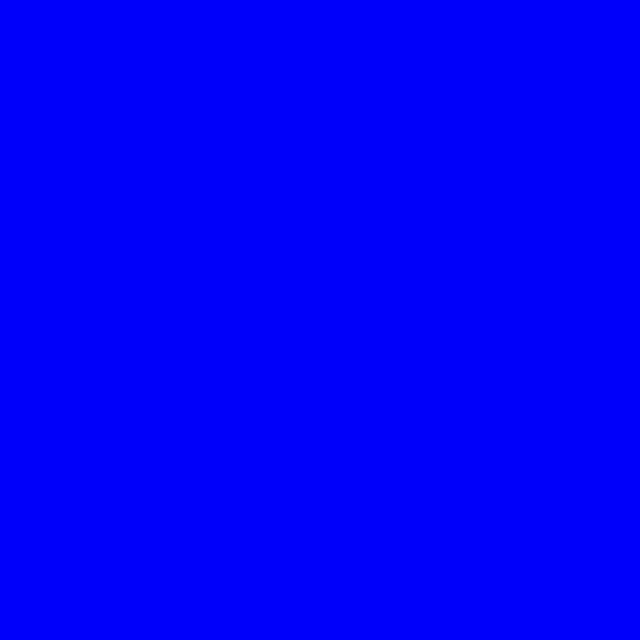

In [4]:
from PIL import Image
im0s = Image.new('RGB', (640,640), (0, 0, 250))
im0s.save("junk/Nimagetest.png", "PNG")
im1 = Image.open('junk/Nimagetest.png')
im1

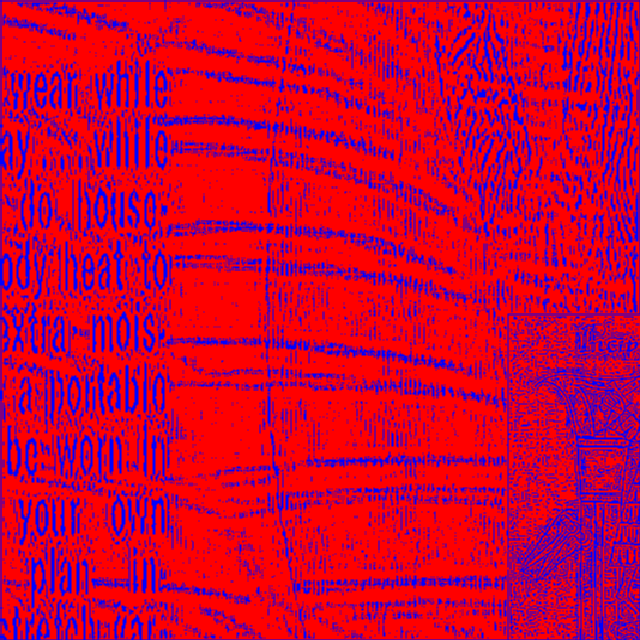

In [12]:
from PIL import Image, ImageChops
import os
import random
path1 = r"testmasks/"
base_image1 = random.choice([
    x1 for x1 in os.listdir(path1)
    if os.path.isfile(os.path.join(path1, x1))
    ])
mask0=(path1+base_image1)

im0s = Image.new('RGB', (640,640), (255, 0, 0))
im0s.save("junk/Nimage0.png", "PNG")
im0 = Image.open('junk/Nimage0.png')
im1 = im0.resize((640,640), Image.NEAREST)

im01s = Image.new('RGB', (640,640), (0, 0, 255))
im01s.save("junk/Nimage1.png", "PNG")    
im01 = Image.open("junk/Nimage1.png")
im2 = im01.resize((640,640), Image.NEAREST)

im02 = Image.open(mask0)
im03 = im02.resize((640,640), Image.NEAREST)
    
result1 = ImageChops.composite(im1, im2, im03)
#filename = time.strftime("output/%Y%m%d%H%M%S.jpg")
#result1.save(filename)
result1

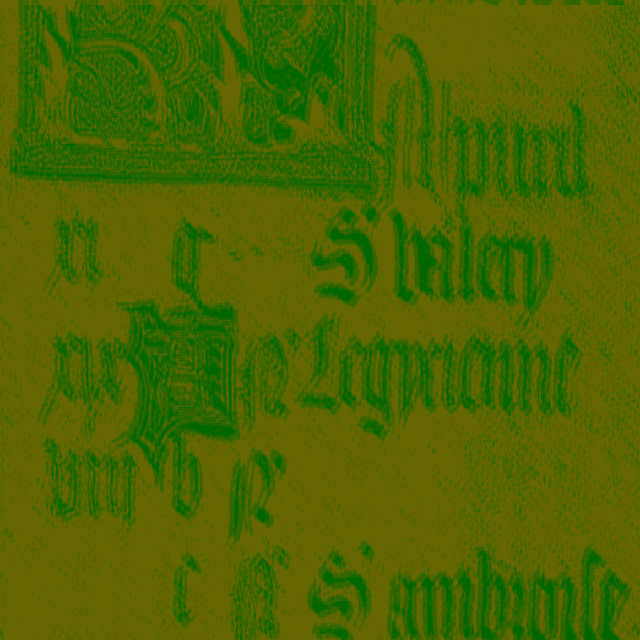

In [28]:
from PIL import Image, ImageChops
import os
import time
import random
path1 = r"testmasks/"
base_image1 = random.choice([
    x1 for x1 in os.listdir(path1)
    if os.path.isfile(os.path.join(path1, x1))
    ])
mask0=(path1+base_image1)

im0s = Image.new('RGB', (640,640), (102, 102, 0))
im0s.save("junk/Nimage0.png", "PNG")
im0 = Image.open('junk/Nimage0.png')
im1 = im0.resize((640,640), Image.NEAREST)

im01s = Image.new('RGB', (640,640), (0, 102, 0))
im01s.save("junk/Nimage1.png", "PNG")    
im01 = Image.open("junk/Nimage1.png")
im2 = im01.resize((640,640), Image.NEAREST)

im02 = Image.open(mask0)
im03 = im02.resize((640,640), Image.NEAREST)
    
result1 = ImageChops.composite(im1, im2, im03)
result2 = ImageChops.invert(result1)
result3 = ImageChops.offset(result1, 5,5)
result4 = ImageChops.blend(result1,result3,.5)

filename = time.strftime("junk/embossed01.jpg")
result4.save(filename)
result4

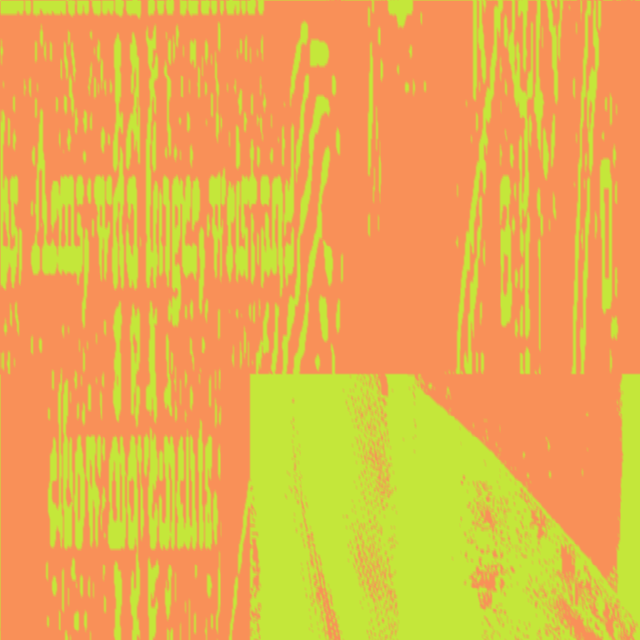

In [46]:
from PIL import Image, ImageChops
import os
import time
import random
from random import randint
path1 = r"testmasks/"
base_image1 = random.choice([
    x1 for x1 in os.listdir(path1)
    if os.path.isfile(os.path.join(path1, x1))
    ])
mask0=(path1+base_image1)

r = randint(50,255)
g = randint(50,255)
b = randint(50,255)


im0s = Image.new('RGB', (640,640), (r, g, b))
im0s.save("junk/Nimage0.png", "PNG")
im0 = Image.open('junk/embossed01.png')
im1 = im0.resize((640,640), Image.NEAREST)

r = randint(50,255)
g = randint(50,255)
b = randint(50,255)


im01s = Image.new('RGB', (640,640), (r, g, b))
im01s.save("junk/Nimage1.png", "PNG")    
im01 = Image.open("junk/Nimage1.png")
im2 = im01.resize((640,640), Image.NEAREST)

im02 = Image.open(mask0)
im03 = im02.resize((640,640), Image.NEAREST)
    
result1 = ImageChops.composite(im1, im2, im03)
result2 = ImageChops.invert(result1)
result3 = ImageChops.offset(result1, 1,1)
result4 = ImageChops.blend(result1,result3,.5)

filename = time.strftime("junk/embossed01.png")

path1 = r"testmasks/"
base_image1 = random.choice([
    x1 for x1 in os.listdir(path1)
    if os.path.isfile(os.path.join(path1, x1))
    ])
mask0=(path1+base_image1)

r = randint(50,255)
g = randint(50,255)
b = randint(50,255)

im0s = Image.new('RGB', (640,640), (r, g, b))
im0s.save("junk/Nimage0.png", "PNG")
im0 = Image.open('junk/Nimage0.png')
im1 = im0.resize((640,640), Image.NEAREST)

r = randint(50,255)
g = randint(50,255)
b = randint(50,255)

im01s = Image.new('RGB', (640,640), (r, g, b))
im01s.save("junk/Nimage1.png", "PNG")    
im01 = Image.open("junk/Nimage1.png")
im2 = im01.resize((640,640), Image.NEAREST)

im02 = Image.open(mask0)
im03 = im02.resize((640,640), Image.NEAREST)
    
result1 = ImageChops.composite(im1, im2, im03)
result2 = ImageChops.invert(result1)
result3 = ImageChops.offset(result1, 1,1)
result4 = ImageChops.blend(result1,result3,.5)


filename = time.strftime("junk/embossed01.png")

result4.save(filename)
result4

http://www.rapidtables.com/web/color/RGB_Color.htm

# ------- Some Neat Utilities -------

In [ ]:
from PIL import ImageFilter

im1 = im.filter(ImageFilter.BLUR)

im2 = im.filter(ImageFilter.MinFilter(3))


In [ ]:
from PIL import Image


path = r"publish/"
base_image = random.choice([
    x for x in os.listdir(path)
    if os.path.isfile(os.path.join(path, x))
    ])
filename0=(path+base_image)

col = Image.open(filename0)
gray = col.convert('L')
bw = gray.point(lambda x: 0 if x<150 else 255, '1')
bw
#bw.save("result_bw.png")
#filename = time.strftime("masks/%Y%m%d%H%M%S.jpg")
#bw.save(filename)

In [ ]:
from PIL import Image


path = r"publish/"
base_image = random.choice([
    x for x in os.listdir(path)
    if os.path.isfile(os.path.join(path, x))
    ])
filename0=(path+base_image)

col = Image.open(filename0)
gray = col.convert('L')
bw = gray.point(lambda x: 0 if x<150 else 255, '1')
bw
#bw.save("result_bw.png")
#filename = time.strftime("masks/%Y%m%d%H%M%S.jpg")
#bw.save(filename)

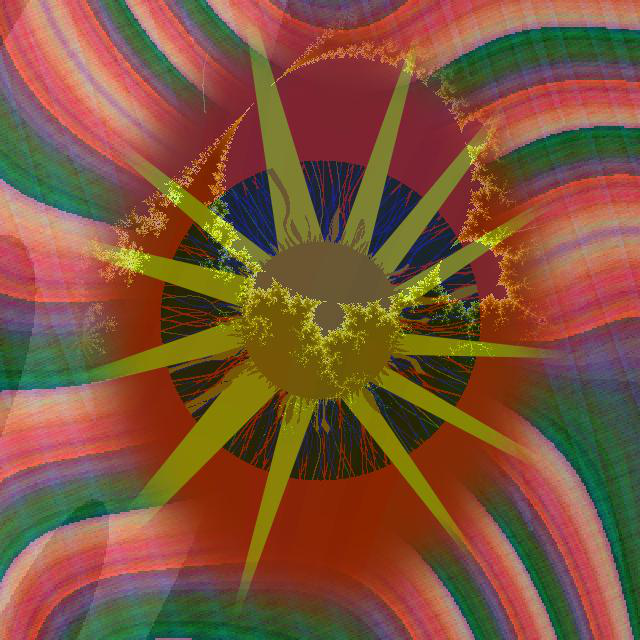

In [12]:
from PIL import Image
im = Image.open('publish/20170819160925.jpg')
im

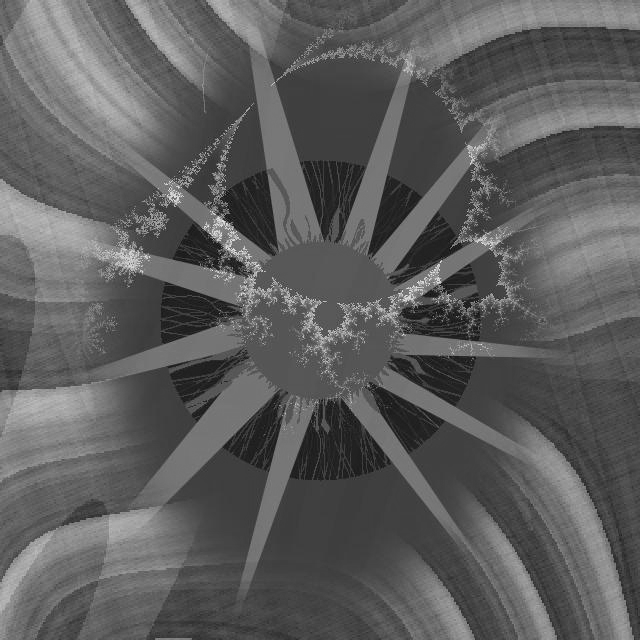

In [13]:
from PIL import Image
col = Image.open('publish/20170819160925.jpg')
gray = col.convert('L')
gray

In [16]:
from PIL import Image

im = Image.open('publish/20170819160925.jpg')
im_grey = im.convert('LA') # convert to grayscale
width,height = im.size

total=0
for i in range(0,width):
    for j in range(0,height):
        total += im_grey.getpixel((i,j))[0]

mean = total / (width * height)

print mean

93


In [26]:
from PIL import Image
import time
im = Image.open('publish/20170819160925.jpg')
im_grey = im.convert('LA') # convert to grayscale
width,height = im.size

total=0
for i in range(0,width):
    for j in range(0,height):
        total += im_grey.getpixel((i,j))[0]
        
mean = total / (width * height)
bw = gray.point(lambda x: 0 if x<mean else 255, '1')
time.sleep(3)
filename = time.strftime("testmasks/%Y%m%d%H%M%S.jpg")
bw.save(filename)

In [32]:
from PIL import Image
import time
path = r"build/"
count=0
while count <300:
    base_image = random.choice([
        x for x in os.listdir(path)
        if os.path.isfile(os.path.join(path, x))
        ])
    filename0=(path+base_image)
    im = Image.open(filename0)
    im_grey = im.convert('LA') # convert to grayscale
    width,height = im.size

    total=0
    for i in range(0,width):
        for j in range(0,height):
            total += im_grey.getpixel((i,j))[0]

    mean = total / (width * height)
    bw = gray.point(lambda x: 0 if x<mean else 255, '1')
    time.sleep(3)
    filename = time.strftime("testmasks/%Y%m%d%H%M%S.jpg")
    bw.save(filename)
    count=count+1

KeyboardInterrupt: 

In [ ]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

"""Binarize (make it black and white) an image with Pyhton."""

from PIL import Image
from scipy.misc import imsave
import numpy


def binarize_image(img_path, target_path, threshold):
    """Binarize an image."""
    image_file = Image.open(img_path)
    image = image_file.convert('L')  # convert image to monochrome
    image = numpy.array(image)
    image = binarize_array(image, threshold)
    imsave(target_path, image)


def binarize_array(numpy_array, threshold=200):
    """Binarize a numpy array."""
    for i in range(len(numpy_array)):
        for j in range(len(numpy_array[0])):
            if numpy_array[i][j] > threshold:
                numpy_array[i][j] = 255
            else:
                numpy_array[i][j] = 0
    return numpy_array


def get_parser():
    """Get parser object for script xy.py."""
    from argparse import ArgumentParser, ArgumentDefaultsHelpFormatter
    parser = ArgumentParser(description=__doc__,
                            formatter_class=ArgumentDefaultsHelpFormatter)
    parser.add_argument("-i", "--input",
                        dest="input",
                        help="read this file",
                        metavar="FILE",
                        required=True)
    parser.add_argument("-o", "--output",
                        dest="output",
                        help="write binarized file hre",
                        metavar="FILE",
                        required=True)
    parser.add_argument("--threshold",
                        dest="threshold",
                        default=200,
                        type=int,
                        help="Threshold when to show white")
    return parser


if __name__ == "__main__":
    args = get_parser().parse_args()
    binarize_image(args.input, args.output, args.threshold)

In [ ]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

"""Binarize (make it black and white) an image with Pyhton."""

from PIL import Image
from scipy.misc import imsave
import numpy


def binarize_image(img_path, target_path, threshold):
    """Binarize an image."""
    image_file = Image.open(img_path)
    image = image_file.convert('L')  # convert image to monochrome
    image = numpy.array(image)
    image = binarize_array(image, threshold)
    imsave(target_path, image)


def binarize_array(numpy_array, threshold=200):
    """Binarize a numpy array."""
    for i in range(len(numpy_array)):
        for j in range(len(numpy_array[0])):
            if numpy_array[i][j] > threshold:
                numpy_array[i][j] = 255
            else:
                numpy_array[i][j] = 0
    return numpy_array


def get_parser():
    """Get parser object for script xy.py."""
    from argparse import ArgumentParser, ArgumentDefaultsHelpFormatter
    parser = ArgumentParser(description=__doc__,
                            formatter_class=ArgumentDefaultsHelpFormatter)
    parser.add_argument("-i", "--input",
                        dest="input",
                        help="read this file",
                        metavar="FILE",
                        required=True)
    parser.add_argument("-o", "--output",
                        dest="output",
                        help="write binarized file hre",
                        metavar="FILE",
                        required=True)
    parser.add_argument("--threshold",
                        dest="threshold",
                        default=200,
                        type=int,
                        help="Threshold when to show white")
    return parser


if __name__ == "__main__":
    args = get_parser().parse_args()
    binarize_image(args.input, args.output, args.threshold)

In [48]:
!ls ~/Desktop/deep-dream-generator/notebooks/bugs/bookdecade1880

0001vintage.jpg  0048vintage.jpg  0095vintage.jpg  0142vintage.jpg
0002vintage.jpg  0049vintage.jpg  0096vintage.jpg  0143vintage.jpg
0003vintage.jpg  0050vintage.jpg  0097vintage.jpg  0144vintage.jpg
0004vintage.jpg  0051vintage.jpg  0098vintage.jpg  0145vintage.jpg
0005vintage.jpg  0052vintage.jpg  0099vintage.jpg  0146vintage.jpg
0006vintage.jpg  0053vintage.jpg  0100vintage.jpg  0147vintage.jpg
0007vintage.jpg  0054vintage.jpg  0101vintage.jpg  0148vintage.jpg
0008vintage.jpg  0055vintage.jpg  0102vintage.jpg  0149vintage.jpg
0009vintage.jpg  0056vintage.jpg  0103vintage.jpg  0150vintage.jpg
0010vintage.jpg  0057vintage.jpg  0104vintage.jpg  0151vintage.jpg
0011vintage.jpg  0058vintage.jpg  0105vintage.jpg  0152vintage.jpg
0012vintage.jpg  0059vintage.jpg  0106vintage.jpg  0153vintage.jpg
0013vintage.jpg  0060vintage.jpg  0107vintage.jpg  0154vintage.jpg
0014vintage.jpg  0061vintage.jpg  0108vintage.jpg  0155vintage.jpg
0015vintage.jpg  0062vintage.jpg  0109vintage.jpg  0156vintage

In [27]:
from PIL import Image
import time
import random
import os
count = 0    
while count <150:    
    path = r"experiment/"
    
    base_image = random.choice([
        x for x in os.listdir(path)
        if os.path.isfile(os.path.join(path, x))
        ])
    filename0=(path+base_image)
    im = Image.open(filename0)
    im_grey = im.convert('LA') # convert to grayscale
    width,height = im.size

    total=0
    for i in range(0,width):
        for j in range(0,height):
            total += im_grey.getpixel((i,j))[0]

    mean = total / (width * height)
    bw = gray.point(lambda x: 0 if x<mean else 255, '1')
    time.sleep(2)
    filename = time.strftime("testmasks/%Y%m%d%H%M%S.jpg")
    bw.save(filename)
    count=count+1

KeyboardInterrupt: 

In [18]:
!mkdir testmasks

In [1]:
from skimage import io
import numpy as np
image = io.imread('http://i.stack.imgur.com/Y8UeF.jpg')
print(np.mean(image))



60.262488


In [8]:
#You might want to convert all images to float to get a value betwenn 0 and 1:

from skimage import io, img_as_float
import numpy as np

image = io.imread('publish/20170819160925.jpg')
image = img_as_float(image)
print(np.mean(image))

0.351685425603
